#Flipkart Project

The following data contains the CSAT scores and its causing factors in a CSV file, we need to analyze and give suggestions to improve the CSAT Score.

Lets start by importing the required libraries and reading the function
Make sure to upload the Customer_support_data.csv to your runtime.

In [101]:
#import and read the given data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'/content/Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-23 11:13,01-08-23 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-23 12:52,01-08-23 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-23 20:16,01-08-23 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-23 20:56,01-08-23 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-23 10:30,01-08-23 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


#Now lets clean the data and filter it out to have only what's needed for us

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [100]:
#change all date to datetime type

import pandas as pd

df['issue_reported_at'] = pd.to_datetime(df['Issue_reported at'], format='%d-%m-%Y', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['response_time_mins'] = (df['issue_responded'] - df['issue_reported_at']).dt.total_seconds() / 60
df = df[df['response_time_mins'] >= 0]
df = df[df['response_time_mins'] < 10000]

In [98]:
#filter out columns that are needed for analyzing the data

df_filtered = df[['CSAT Score', 'channel_name', 'category', 'Sub-category',
                  'response_time_mins','connected_handling_time', 'Agent_name', 'Supervisor', 'Manager',
                  'Tenure Bucket', 'Agent Shift', 'Item_price']]

#Now lets plot a countplot for the CSAT Score

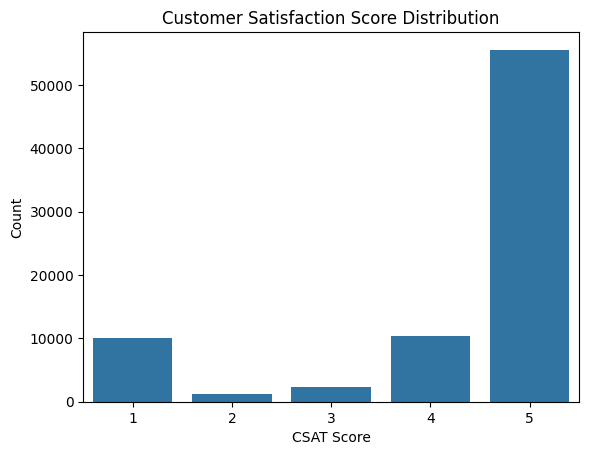

In [99]:
sns.countplot(x='CSAT Score', data=df)
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

#Now let's start factoring in each column/action's role in CSAT

## 1. Impact of CSAT w.r.t Response Time
Response Time is the gap between the reported time and the responded time.
Lets see how the duration of response plays a factor in the CSAT Scores

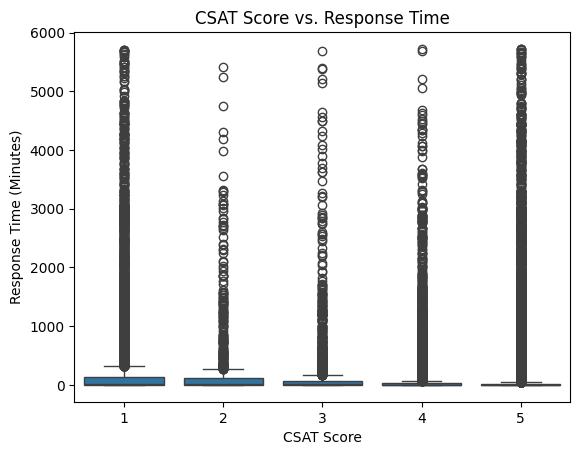

In [41]:
#boxplot of the relation between CSAT score and response time.

sns.boxplot(x='CSAT Score', y='response_time_mins', data=df)
plt.title("CSAT Score vs. Response Time")
plt.xlabel("CSAT Score")
plt.ylabel("Response Time (Minutes)")
plt.show()

From the barplot, it can be seen that both 1 and 5 has the same response times and the relation cannot be analyzed quite accurately, hence a scatterplot with a regression line can be used to identify the relation via slope

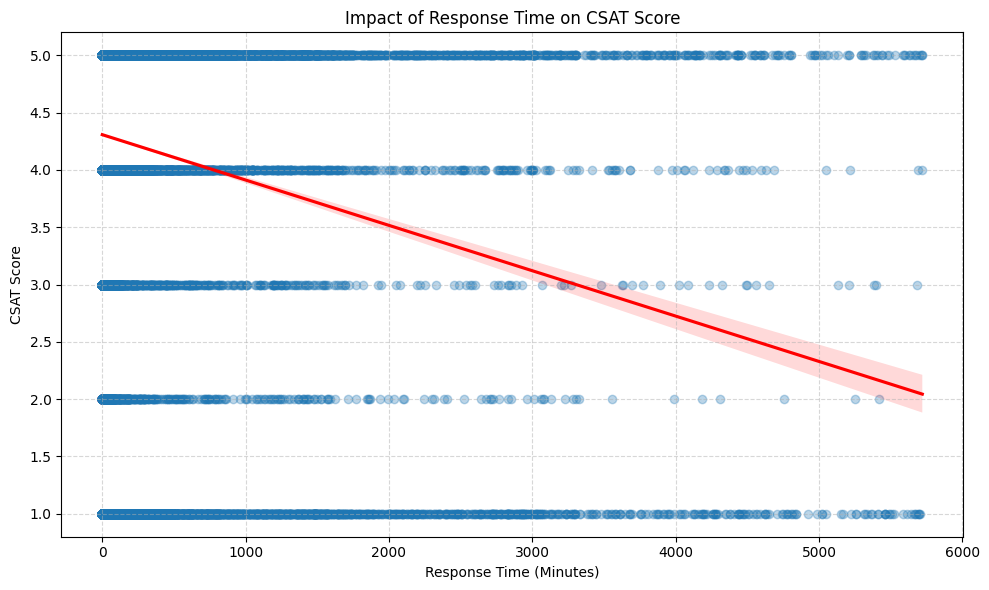

In [42]:
# scatter plot w/ regression line to identify the relation easily.

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='response_time_mins', y='CSAT Score',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Impact of Response Time on CSAT Score')
plt.xlabel('Response Time (Minutes)')
plt.ylabel('CSAT Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From the scatterplot, it can be seen that the regression line is sloped downwards with increasing response time with a little region of error towards the end.

The slope shows decrease in CSAT score with increasing response time hence faster response times can improve CSAT scores.

#2. Impact of CSAT w.r.t to Channel of Communication
Lets see how each channels contribute to the CSAT scores

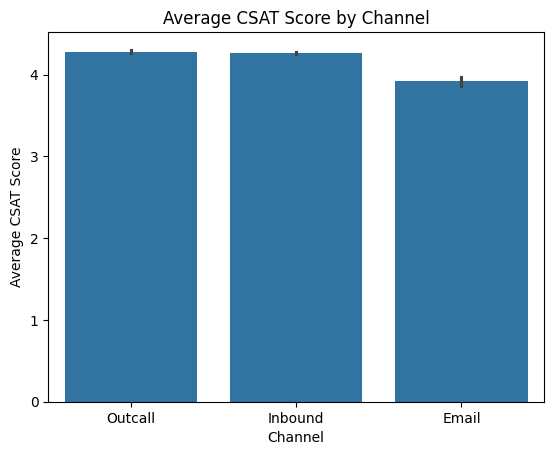

In [43]:
sns.barplot(x='channel_name', y='CSAT Score', data=df)
plt.title("Average CSAT Score by Channel")
plt.xlabel("Channel")
plt.ylabel("Average CSAT Score")
plt.show()

It can be seen that both Outbound and Inbound Channels have an average CSAT Score above 5 whereas Email could falls below 4.

Focusing a bit more on the Email Channels would be a great idea

#3. Impact of CSAT w.r.t Agent Perfomance
Lets see how the perfomance of agents can impact the CSAT scores

First lets take the 10 bottom-performing agents to see the CSAT scores of the low-performers

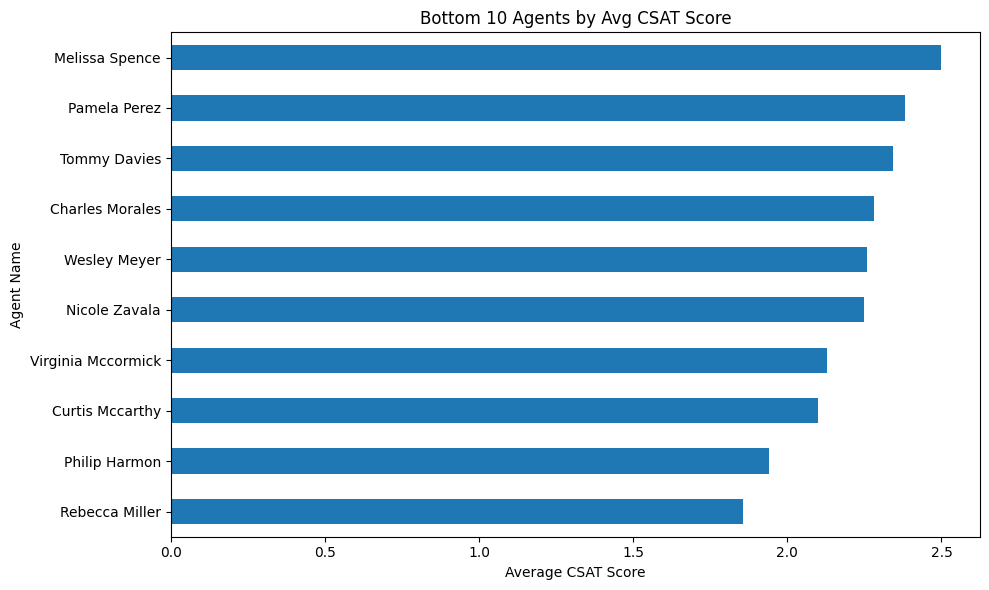

In [44]:
# Group by Agent_name and calculate the mean CSAT Score
agent_csat = df.groupby('Agent_name')['CSAT Score'].mean()

# Sort in ascending order to find bottom performers and select the top 10
bottom_agents = agent_csat.sort_values(ascending=True).head(10)

# Create a horizontal bar plot for the bottom 10 agents
plt.figure(figsize=(10, 6))
bottom_agents.plot(kind='barh')
plt.title('Bottom 10 Agents by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()

We can see that bottom 10 have their scores below half of the CSAT i.e less than 2.5

Now let's see the top performers and their scores.

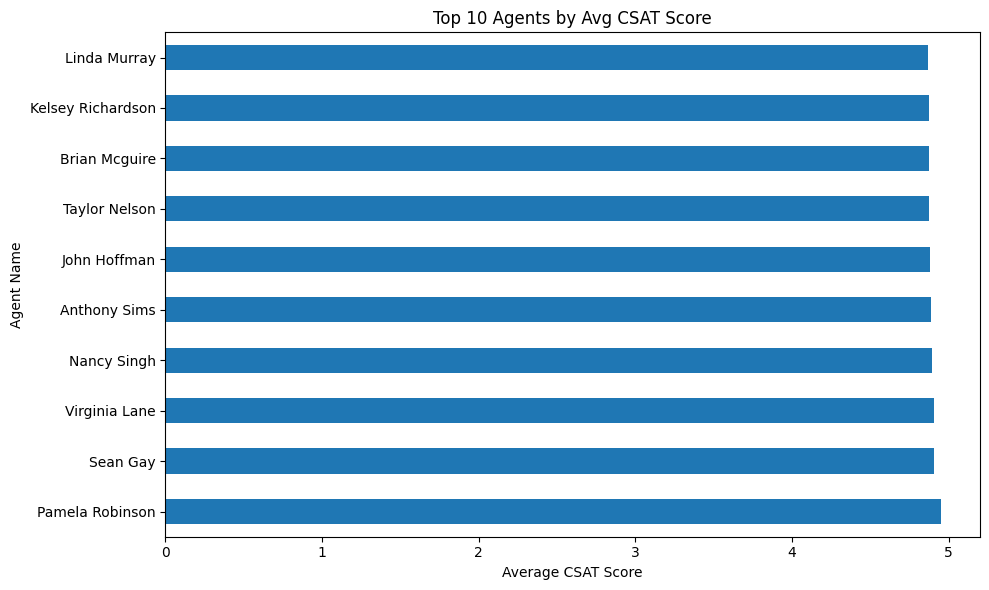

In [47]:
# Sort in descending order to find top performers and select the top 10
top_agents = agent_csat.sort_values(ascending=False).head(10)

# Create a horizontal bar plot for the top 10 agents
plt.figure(figsize=(10, 6))
top_agents.plot(kind='barh')
plt.title('Top 10 Agents by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.tight_layout()
plt.show()

It can be seen that the Top 10 Agents are perfoming well scoring a near 5 average CSAT score.


---



Hence we can come to the conclusion that the bottom agents should be taken into consideration and their method of service shall be improved to improve the overall CSAT scores


#3. Impact of CSAT w.r.t Manager Perfomance

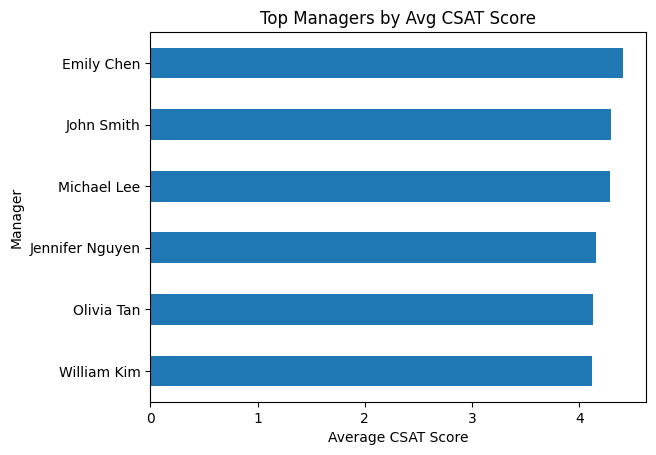

In [49]:
#5. Manager Perfomance

top_managers = df.groupby('Manager')['CSAT Score'].mean().sort_values(ascending=True).head(6)
top_managers.plot(kind='barh')
plt.title('Top Managers by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Manager')
plt.show()

All 6 managers seem to have good average CSAT Scores. The one on top like Emily Chen can be awarded for her perfomance and the others can be motivated to push their agents further towards a near 5 average CSAT score.

#4. Impact of CSAT w.r.t Agent Tenure Bucket
Usual boxplot wouldn't be able to provide accurate data hence I used countplot to get in-depth analysis of the impact.


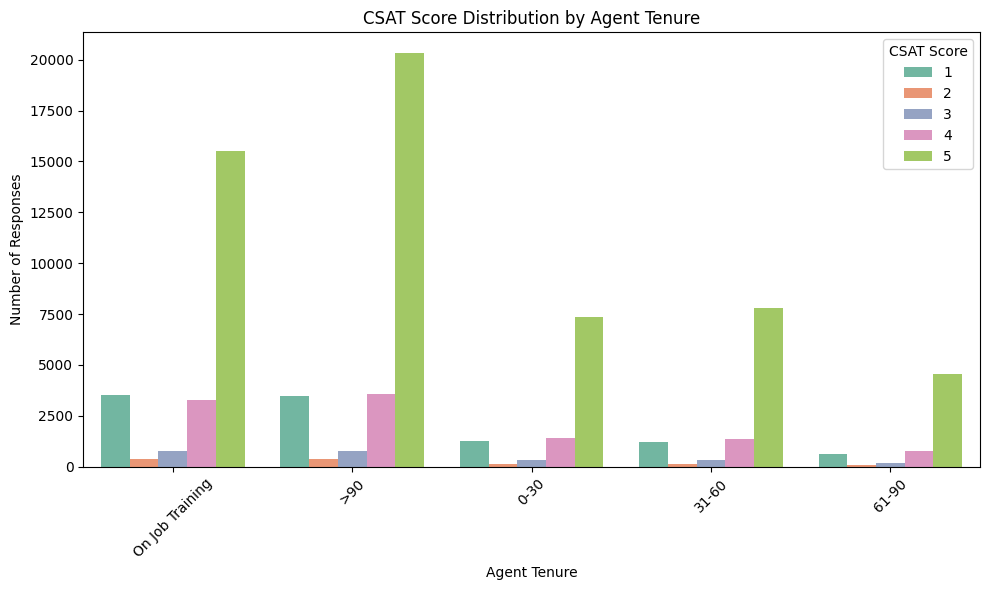

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Tenure Bucket', hue='CSAT Score', palette='Set2')
plt.title("CSAT Score Distribution by Agent Tenure")
plt.xlabel("Agent Tenure")
plt.ylabel("Number of Responses")
plt.legend(title="CSAT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
# Filter the DataFrame to include only CSAT scores of 1 and 5
csat_1_5_df = df[df['CSAT Score'].isin([1, 5])]

# Group by 'Tenure Bucket' and 'CSAT Score' and count the occurrences
tenure_csat_counts = csat_1_5_df.groupby(['Tenure Bucket', 'CSAT Score']).size().unstack(fill_value=0)

# Calculate the total count for each tenure bucket
tenure_counts = df['Tenure Bucket'].value_counts()

# Calculate the ratio of 1 and 5 CSAT scores for each tenure bucket
tenure_ratios = pd.DataFrame({
    'Ratio_CSAT_1': tenure_csat_counts[1] / tenure_counts,
    'Ratio_CSAT_5': tenure_csat_counts[5] / tenure_counts
})

# Display the ratios
print("Ratio of 1-star and 5-star CSAT Scores by Agent Tenure:")
display(tenure_ratios)

Ratio of 1-star and 5-star CSAT Scores by Agent Tenure:


,Ratio_CSAT_1,Ratio_CSAT_5
Tenure Bucket,,
0-30,0.119535,0.701876
31-60,0.112882,0.719314
61-90,0.101084,0.735565
>90,0.122126,0.712223
On Job Training,0.149471,0.660513


From this we can see that both Experienced and Job Training Workers have the same ratio of ratings hence CSAT Scores and Experience are not directly proportional but its more based on the work they put in.

Job Training people have the highest 1 CSAT ratio and the lowest 5 CSAT ratio
The 0-90 day group has a relative amount and out of them 61-90 has the highest CSAT ratio of 5. The Experienced people i.e >90 have the second highest 1 CSAT ratio and a 5 CSAT ratio lower than 61-90 tenure group

---

People in training getting 1 star reviews is fine because they are learning to improve everyday hence the training and it can be seen that people working from on 1 month, 2 month and 3 month tenures have relatively lower level of 1s compared to 5s whereas experienced workers, though they put in the work they seem to not be on their best as they do have a huge difference in the ratios of 1 to 5 compared to the 3 month and below people.

---
Hence it can be suggested that Job Training people can be trained better so to reduce the 1 star ratings even more and the 1 month 2 month 3 month can also be motivated to work harder whereas the experienced needs to supervised better to make less mistakes and reduce bad customer interactions leading to reduced CSAT scores.


#5. Impact of CSAT w.r.t to Agent Shift

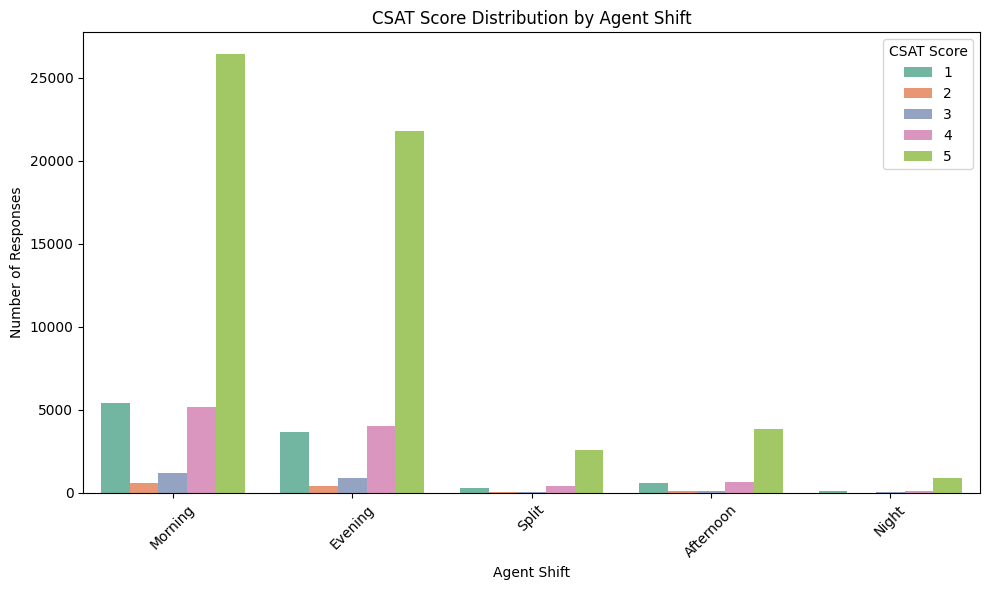

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Agent Shift', hue='CSAT Score', palette='Set2')
plt.title("CSAT Score Distribution by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Number of Responses")
plt.legend(title="CSAT Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this we can see that morning and evening are the times of most interactions and it does have a lot of 1 CSAT scores. Even the afternoon session has a little high amount of 1 CSAT scores.


---

My suggestion would be to place the top perfoming agents on Morning and Evening Shifts and some on Afternoon. The others can do Split and Night and that'd help with the CSAT Scores a lot.



#6. Impact of CSAT w.r.t Handling Time

/tmp/ipython-input-79-3132687248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='CSAT Score', y='connected_handling_time', palette='coolwarm')


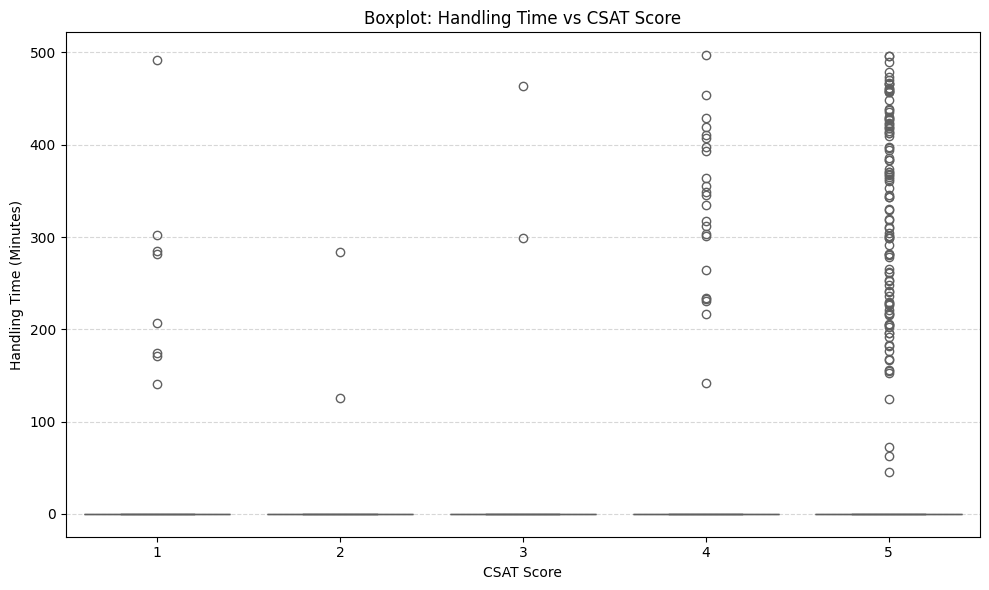

In [79]:
df_filtered = df[df['connected_handling_time'] <= 500]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='CSAT Score', y='connected_handling_time', palette='coolwarm')
plt.title("Boxplot: Handling Time vs CSAT Score")
plt.xlabel("CSAT Score")
plt.ylabel("Handling Time (Minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


From this graph we can see that the CSAT scores for low time periods have recieved both 5 and 1 CSAT scores too but calls that have made it above 300 minutes were all 90% 4 or 5 rated, hence it can be concluded that the customer does not always look for a quicker handling but for a slower more refined solution.

Quicker Handling times can also mean that case wasnt resolved properly or even handled properly. Quality resolution via means of clearly understanding the problem and giving accurate solutions are what matters.


---


Lets also try to relate tenure buckets and 1 star reviews with less than 300 minutes to find out which group of agents mainly have these ratings.


/tmp/ipython-input-86-2736840468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=low_csat_short_handling, x='Tenure Bucket', palette='viridis')


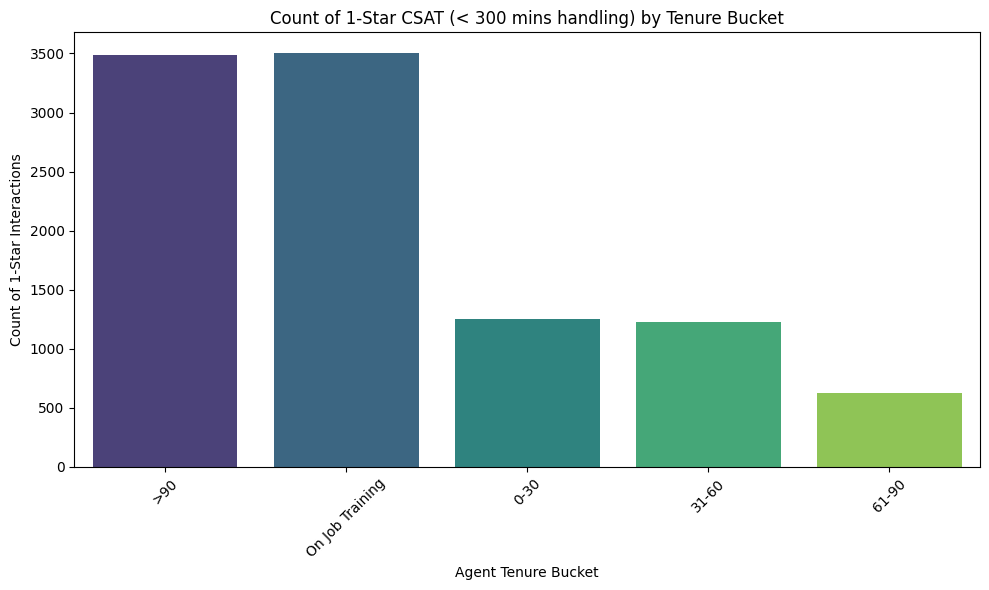

In [86]:
# Lets filter the dataframe for 1-star CSAT scores and handling time less than 300 minutes and plot a graph
low_csat_short_handling = df[(df['CSAT Score'] == 1) & (df['connected_handling_time'] < 300)]

plt.figure(figsize=(10, 6))
sns.countplot(data=low_csat_short_handling, x='Tenure Bucket', palette='viridis')
plt.title('Count of 1-Star CSAT (< 300 mins handling) by Tenure Bucket')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Count of 1-Star Interactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see both trainees and experienced workers have the most 1 star ratings having handling time less than 300 minutes compared to the rest of the team contrasting the before spoken situation of Tenure Bucket.

As you can see the 61-90 day group are once again the best performing with the least 1 CSAT score among the whole group in the given range.

Hence the trainees like said before can be trained better on handling yet they're still learning so its fine but the experienced worker can be supervised better to not have short rapid handling as if to finish it off sooner.

Doing this can reduce the 1 star ratings and hence improve overall CSAT score.

#7. Impact of CSAT w.r.t Supervisor Performance

Let's see how the performance of supervisors impacts the CSAT scores.

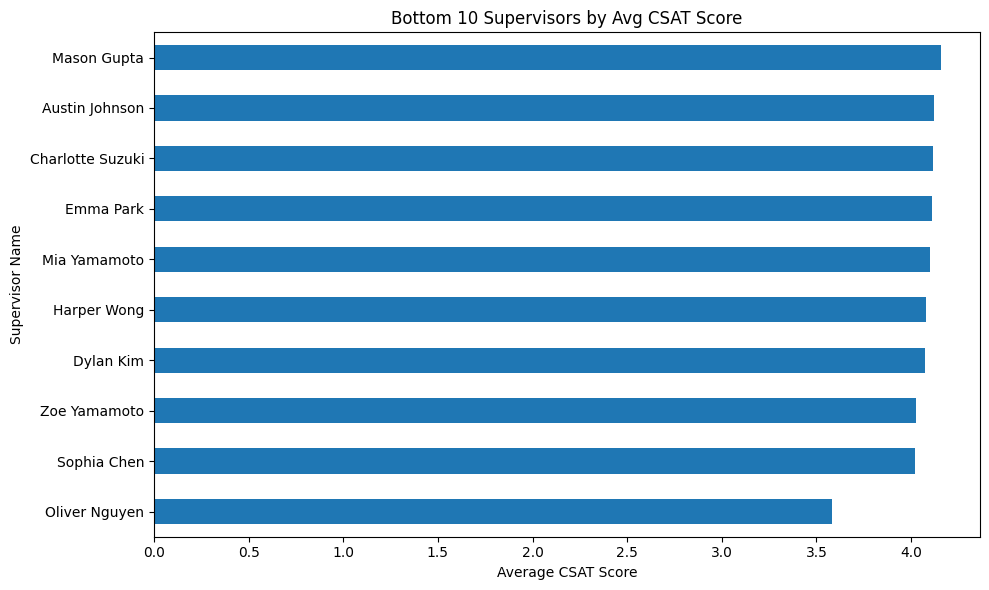

In [60]:
# Group by Supervisor and calculate the mean CSAT Score
supervisor_csat = df.groupby('Supervisor')['CSAT Score'].mean()

# Sort in ascending order to find bottom performers and select the top 10
bottom_supervisors = supervisor_csat.sort_values(ascending=True).head(10)

# Create a horizontal bar plot for the bottom 10 supervisors
plt.figure(figsize=(10, 6))
bottom_supervisors.plot(kind='barh')
plt.title('Bottom 10 Supervisors by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()

We can see that even the low perfoming supervisors are able to keep their avg. CSAT scores above or around 4 except for Oliver Nguyen.

Oliver Nguyen seems to be near 3.5 which is .5 far from everyone else and he seems to the only bottom performer with that score, let's see the agents under him to understand better

In [70]:
# Lets filter the dataframe for the supervisor 'Oliver Nguyen'
olivers_agents = df[df['Supervisor'] == 'Oliver Nguyen']

# Now lets get the agents under this supervisor
agents_on = olivers_agents['Agent_name'].unique()
print("Agents under Supervisor Oliver Nguyen:")
for agent in agents_on:
    print(agent)

Agents under Supervisor Oliver Nguyen:
Christopher Mcintosh
Willie Flores
Laura Allen
Rebecca Miller
James Chung
Nicole Zavala


In [71]:
# Lets group the data by Agent_name and calculate the mean CSAT Score for each agent
agentO_csat = olivers_agents.groupby('Agent_name')['CSAT Score'].mean()
print("Average CSAT Score for each Agent under Supervisor Oliver Nguyen:")
display(agentO_csat)

Average CSAT Score for each Agent under Supervisor Oliver Nguyen:


,CSAT Score
Agent_name,
Christopher Mcintosh,4.159091
James Chung,4.010870
Laura Allen,3.568182
Nicole Zavala,2.250000
Rebecca Miller,1.857143
Willie Flores,2.500000


From this we can see that although Oliver has two good agents under him and the rest are doing very bad in terms of CSAT scores scoring 3.5 and below. Now it may be that Oliver has gotten unlucky in his agent choices but luck doesnt come in statistics and Oliver, as a supervisor is responsible for the CSAT scores of his agents and hence has to be taken into account and trained better or whatever may it be to improve the overall CSAT scores.

---

Now let's see the top performing supervisors and their scores.


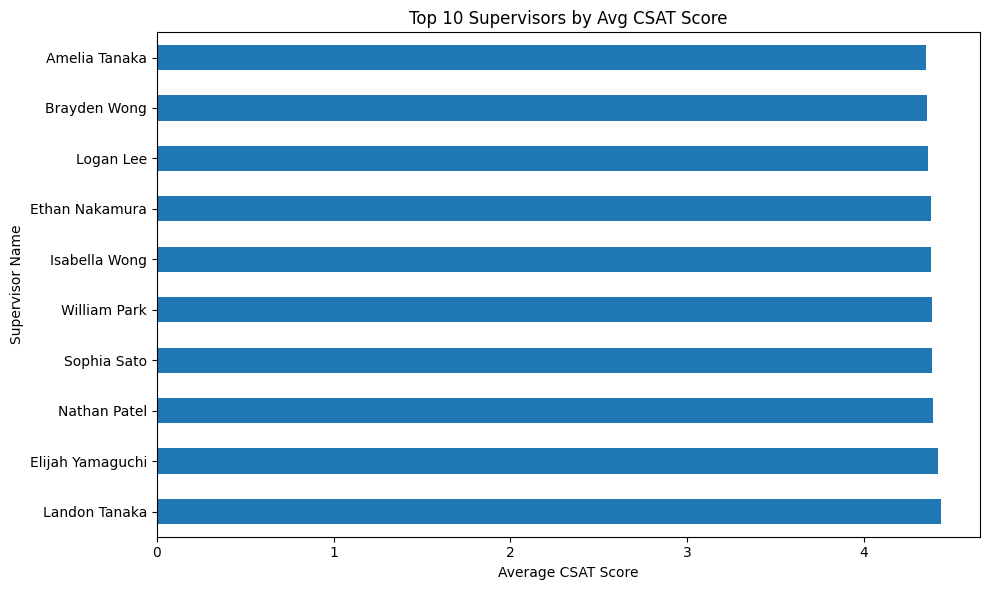

In [61]:
# Sort in descending order to find top performers and select the top 10
top_supervisors = supervisor_csat.sort_values(ascending=False).head(10)

# Create a horizontal bar plot for the top 10 supervisors
plt.figure(figsize=(10, 6))
top_supervisors.plot(kind='barh')
plt.title('Top 10 Supervisors by Avg CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Supervisor Name')
plt.tight_layout()
plt.show()

We can see that the top perfoming are all well above the 4 average CSAT score range hence they seem to be doing a good job in supervising their agents. Hence they can be praised and the bottom 10 can be motivated to reach above 4 average CSAT range.

#Additional Research based on previous analysis

In [96]:
# Filter the DataFrame for agents in the ">90" tenure bucket
experienced_agents_df = df[df['Tenure Bucket'] == '>90']

# Group by Supervisor and calculate the mean CSAT Score for these experienced agents
supervisor_csat_experienced = experienced_agents_df.groupby('Supervisor')['CSAT Score'].mean()

# Display the average CSAT score for experienced agents under each supervisor
print("Average CSAT Score for Experienced Agents (>90 Tenure) by Supervisor:")
display(supervisor_csat_experienced.sort_values(ascending=False).tail())

Average CSAT Score for Experienced Agents (>90 Tenure) by Supervisor:


,CSAT Score
Supervisor,
Charlotte Suzuki,3.931373
Sophia Chen,3.924242
Zoe Yamamoto,3.923789
Emma Park,3.639937
Oliver Nguyen,3.584000


After an analysis on the supervisors of the >90 tenure bucket we can see that these are the worse perfoming of them all and Oliver Nguyen comes up again proving the earlier claim about him. Hence Oliver Nguyen along with the other supervisors have to be taken care of for improved CSAT scores. Now lets see the agents of this tenure bucket that are perfoming bad

In [90]:
# Filter the DataFrame for agents in the ">90" tenure bucket (already have experienced_agents_df)

# Group by Agent_name and calculate the mean CSAT Score for experienced agents
agent_csat_experienced = experienced_agents_df.groupby('Agent_name')['CSAT Score'].mean()

# Sort in ascending order to find the worst performers and select the bottom 10
worst_experienced_agents = agent_csat_experienced.sort_values(ascending=True).head(10)

# Display the worst performing experienced agents and their average CSAT scores
print("Worst Performing Experienced Agents (>90 Tenure) by Avg CSAT Score:")
display(worst_experienced_agents)

Worst Performing Experienced Agents (>90 Tenure) by Avg CSAT Score:


,CSAT Score
Agent_name,
Rebecca Miller,1.857143
Philip Harmon,1.941176
Curtis Mccarthy,2.100000
Virginia Mccormick,2.129032
Nicole Zavala,2.250000
Wesley Meyer,2.259259
Charles Morales,2.281250
Tommy Davies,2.342857
Pamela Perez,2.382353


These are the bottom 10 agents who have average CSAT score below 2.5 and they need to be trained and taken care of so that the CSAT scores will improve. Hence improving these agents can bring a big boost in the CSAT scores.

## Summary of Analysis:

Based on the analysis of the customer support data, the following key findings have been identified regarding factors influencing CSAT scores:

*   **Overall CSAT Distribution:** The majority of CSAT scores are at the highest level (5), but there is also a significant number of the lowest scores (1), indicating a polarization in customer satisfaction. There is a similar amount of (4) followed by (3) and (2) indicating some unprecedented mixed reviews.

*   **Response Time:** There is a general trend of decreasing CSAT scores with increasing response time, suggesting that faster responses tend to lead to higher customer satisfaction.

*   **Channel of Communication:** Email channel has a lower average CSAT score compared to Outcall and Inbound channels, indicating potential areas for improvement in handling email-based support.

*   **Agent Performance:** There is a clear distinction in CSAT scores between top and bottom performing agents. Addressing the performance of agents with consistently low CSAT scores by giving them the required training is crucial for overall improvement.

*   **Manager Performance:** While most managers have relatively good average CSAT scores, there are variations. Further investigation into the practices of managers with lower average scores could be beneficial.

*   **Agent Tenure Bucket:** The analysis of CSAT ratios by tenure shows that agents in "On Job Training" have the highest ratio of 1-star ratings and the lowest ratio of 5-star ratings. Agents in the "61-90" tenure bucket appear to perform best in terms of minimizing 1-star and maximizing 5-star ratings. Experienced agents (>90 tenure) show a slightly higher ratio of 1-star ratings compared to the 0-90 tenure groups. Supervising the experienced and giving better training to the new ones can significantly improve the CSAT scores.

*   **Agent Shift:** The Morning and Evening shifts have the highest volume of interactions and also a notable number of 1-star CSAT scores. Putting Top Performers in those shifts can improve the CSAT score by a huge amount reducing 1-star scores

*   **Handling Time:** While quick handling times can sometimes result in low CSAT (potentially due to unresolved issues), longer handling times don't necessarily guarantee high CSAT. Quality of resolution seems more impactful than just the duration of the interaction. The analysis of 1-star CSAT scores with short handling times showed that both trainees and experienced agents contribute significantly to this category.

*   **Supervisor Performance (Oliver Nguyen Example):** The detailed look into agents under a specific supervisor (Oliver Nguyen) with a lower average CSAT score highlighted that while some agents under this supervisor perform well, others have significantly low CSAT scores, impacting the team's overall average. This suggests the importance of targeted support and training for underperforming agents, and potentially supervisory coaching.


*   **Addition Research:** From extended analysis of the supervisors of >90 Tenure Bucket and the worse perfoming agents in that category the supervisors and agents who should be trained the most have been marked and once they are taken care of, the overall CSAT scores should see improvement

-

In conclusion, improving CSAT scores requires a multi-faceted approach focusing on reducing response times, optimizing the email channel, providing targeted training and support to lower-performing agents and those in training, potentially adjusting agent shifts based on performance, emphasizing quality of resolution over speed, and providing effective supervision, especially for experienced agents who may be contributing to low scores with quick handling times.